<a href="https://colab.research.google.com/github/vantuan5644/MachineLearningCourse/blob/master/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LUNA 2016 - Lung Nodeule Analysis**

- Objective: Detect the location of nodules from volunmetric CT images

- Dataset: [LUNA 2016 ](https://luna16.grand-challenge.org/Procedure/) 
which contains 888 CT scans from LIDC-IDRI database
  - The dataset had been divided into 10 subsets, subset0.zip to subset9.zip: 10 zip files which contain all CT images
  - annotations.csv: contains the annotations used as reference standard for the 'nodule detection'
  - candidates_V2.csv: csv file that contains an extended set of candidate locations for the 'false positive reduction' track
  



## Download and extract data

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os

In [0]:
%cd /content/drive/My Drive/LUNA2016

/content/drive/My Drive/LUNA2016


In [0]:
!wget https://zenodo.org/record/2604219/files/annotations.csv?download=1
!wget https://zenodo.org/record/2604219/files/candidates.csv?download=1
!wget https://zenodo.org/record/2604219/files/candidates_V2.zip?download=1
!wget https://zenodo.org/record/2604219/files/evaluationScript.zip?download=1
!wget https://zenodo.org/record/2604219/files/seg-lungs-LUNA16.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset0.zip?download=1


!wget https://zenodo.org/record/2604219/files/subset1.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset2.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset3.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset4.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset5.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset6.zip?download=1

!wget https://zenodo.org/record/2596479/files/subset7.zip?download=1
!wget https://zenodo.org/record/2596479/files/subset8.zip?download=1
!wget https://zenodo.org/record/2596479/files/subset9.zip?download=1

In [0]:
target_dir = '/content/drive/My Drive/LUNA2016'
os.listdir(target_dir)

In [0]:
import zipfile
target_dir = '/content/drive/My Drive/LUNA2016'

file_list = [ 'candidates_V2.zip', 'evaluationScript.zip', 'seg-lungs-LUNA16.zip',


]
for file in file_list:
  with zipfile.ZipFile(file, "r") as zip_ref:
      zip_ref.extractall(target_dir)

In [0]:
target_dir = '/content/drive/My Drive/LUNA2016/dataset'
base_dir = '/content/drive/My Drive/LUNA2016'
import subprocess

for i in range(10):
  file_name = 'subset' + str(i) + '.zip'
  print("Extracting: ", file_name)
  file_path = os.path.join(base_dir, file_name)
  if not os.path.isfile(file_path):
      os.rename(file_path + '?download=1', file_path)
  print("Extract dir: ", target_dir + '/subset' + str(i))
  subprocess.call(['7z', 'x', file_path, '-o' + target_dir])


# Preprocessing data

The data consists of many 2D slices which, when combined, produce a 3D rendering of whatever was scanned

#### The labels


In [0]:
import pandas as pd

In [4]:
candidates = pd.read_csv('/content/drive/My Drive/LUNA2016/candidates_V2.csv')
candidates

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0
...,...,...,...,...,...
754970,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-33.400000,-64.200000,-115.560000,0
754971,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,56.236359,70.352400,-203.446236,0
754972,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-97.104221,55.738289,-203.879785,0
754973,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-65.470000,59.670000,-136.370000,0


Annotations is the file that contains locations and diameter (in mm) of the nodules

In [5]:
annotations = pd.read_csv('/content/drive/My Drive/LUNA2016/annotations.csv')
annotations

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203


In [0]:
candidates.seriesuid.nunique()

888

So there are **888** unique ID in the candidates, that means we have 888 patients in the dataset

#### Discovering the data subsets

Because our training data is divided into 10 hold-out folds, so we need to need to discover a little bit about the data inside each subset (number of images, number of patients)

In [0]:
base_path = '/content/drive/My Drive/LUNA2016'


In [0]:
import glob
import os
from fnmatch import fnmatch

root = os.path.join(base_path, 'dataset')
pattern = "*.mhd"

images_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_list.append(os.path.join(path, name))

In [12]:
len(images_list)

884

Because we only use the data in MHD extension so we exclude the .raw files from our list

In [13]:
images_list = []

for i in range(10):
  subset_name = 'subset' + str(i)
 
  subset_path = os.path.join(base_path, 'dataset', subset_name)
  # images_list = sorted(os.listdir(subset_path))
  images_list_small = glob.glob(os.path.join(subset_path, '*.mhd'))

  print(f"Subset {i} contains {len(images_list_small)} images of {len(set(images_list_small))} different patients")

  images_list += (images_list_small)

Subset 0 contains 89 images of 89 different patients
Subset 1 contains 89 images of 89 different patients
Subset 2 contains 89 images of 89 different patients
Subset 3 contains 89 images of 89 different patients
Subset 4 contains 89 images of 89 different patients
Subset 5 contains 89 images of 89 different patients
Subset 6 contains 89 images of 89 different patients
Subset 7 contains 89 images of 89 different patients
Subset 8 contains 88 images of 88 different patients
Subset 9 contains 84 images of 84 different patients


In [14]:
print(len(images_list), len(set(images_list)))

884 884


So we have **884** unique scans in our data after extracting the zip files. Basically its not a big deal 

#### Preprocess steps

Steps:
- Loading the MHD files, adding missing metadata
- Coverting the pixel values to Hounsfield Units (HU)
- Resampling to remove variance in scanner resolution
- 3D plotting
- Lung segmentation
- Normalization
- Zero centering


In [0]:
base_path = '/content/drive/My Drive/LUNA2016'

In [16]:
!pip3 install pydicom
!pip3 install SimpleITK

In [0]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Steps to load .mhd images:
 - Open the image
 - Store it into a numpy array
 - Extract the following info: Pixel Spacing, Origin, PixelSpacing


In [0]:
def load_itk_image(file_name):
  itkimage = sitk.ReadImage(file_name)
  numpyImage = sitk.GetArrayFromImage(itkimage)

  numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
  numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))

  return numpyImage, numpyOrigin, numpySpacing

Since the coordinates of the candidates are given in World Coordinates, we now need to transform from world coornidates to voxel coordinates by using the Origin and the the Pixel Spacing .

The transformation is only valid if there is no rotation component in the transformation matrix

In [0]:
def worldToVoxelCoord(worldCoord, origin, spacing):
  stretchedVoxelCoord  = np.absolute(worldCoor - origin)
  voxelCoord = stretchedVoxelCoord / spacing
  return voxelCoord

In [0]:
worldCoord = np.asarray([float(cand[3]),float(cand[2]),float(cand[1])])
voxelCoord = worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)
patch = numpyImage[voxelCoord[0],voxelCoord[1]-voxelWidth/2:voxelCoord[1]+voxelWidth/2,voxelCoord[2]-voxelWidth/2:voxelCoord[2]+voxelWidth/2]

Get pixels Hounsfield Units, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia

| Substance 	| HU 	|
|-----------------------	|-------------------------------------------------	|
| Air 	| -1000 	|
| Lung 	| -500 	|
| Fat 	| -100 to -50 	|
| Water 	| 0 	|
| CSF 	| 15 	|
| Kidney 	| 30 	|
| Blood 	| +30 to +45 	|
| Muscle 	| +10 to +40 	|
| Grey matter 	| +37 to +45 	|
| White matter 	| +20 to +30 	|
| Liver 	| +40 to +60 	|
| Soft Tissue, Contrast 	| +100 to +300 	|
| Bone 	| +700 (cancellous bone) to +3000 (cortical bone) 	|




Some scanners have cylindrical scanning bounds, but the output image is square. The pixels that fall outside of these bounds get the fixed value -3024


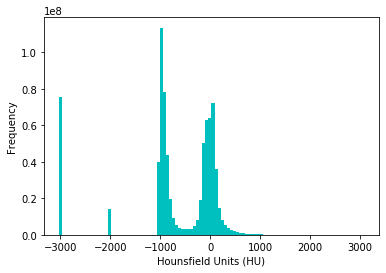

In [0]:
#@title
plt.hist(img.flatten(), bins=100, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


In [0]:
import skimage.io as io
def load_image(img_path):
  img = io.imread(img_path, plugin='simpleitk')
  img[img < -1500] = 0
  return img

In [0]:
img = []
for i, img_path in enumerate(images_list):
  if i > 10:
    break
  img.append(load_image(img_path))

In [0]:
# import itertools
# img = list(itertools.chain(*img))
img = np.array(img)

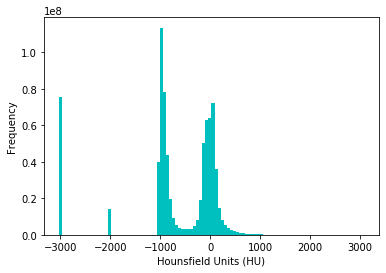

In [24]:
plt.hist(img.flatten(), bins=100, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


In [0]:
def normalizePlanes(npzarray):
  maxHU = 400.
  minHU = -1000.
  npzarray = (npzarray - minHU) / (maxHU - minHU)
  npzarray[npzarray > 1] = 1.
  npzarray[npzarray < 0] = 0.
  return npzarray

#### Visualizing one random patient in 2D plane

In [0]:
img_filename = images_list[1]
img_path = os.path.join(subset_path, img_filename)

In [38]:
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print(numpyImage.shape)
print(numpyOrigin)
print(numpySpacing)

(119, 512, 512)
[-313.75 -190.   -182.5 ]
[2.5        0.74218798 0.74218798]


In [0]:
series_uid = os.path.splitext(img_filename)[0]
cands = candidates[candidates['seriesuid'] == series_uid]

In [0]:
img = load_image(img_path)

In [0]:
import matplotlib

def plot_ct_scan(scan):
  f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
  for i in range(0, scan.shape[0], 5):
    plots[int(i / 20), int((i % 20) / 5)].axis('off')
    plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone) 


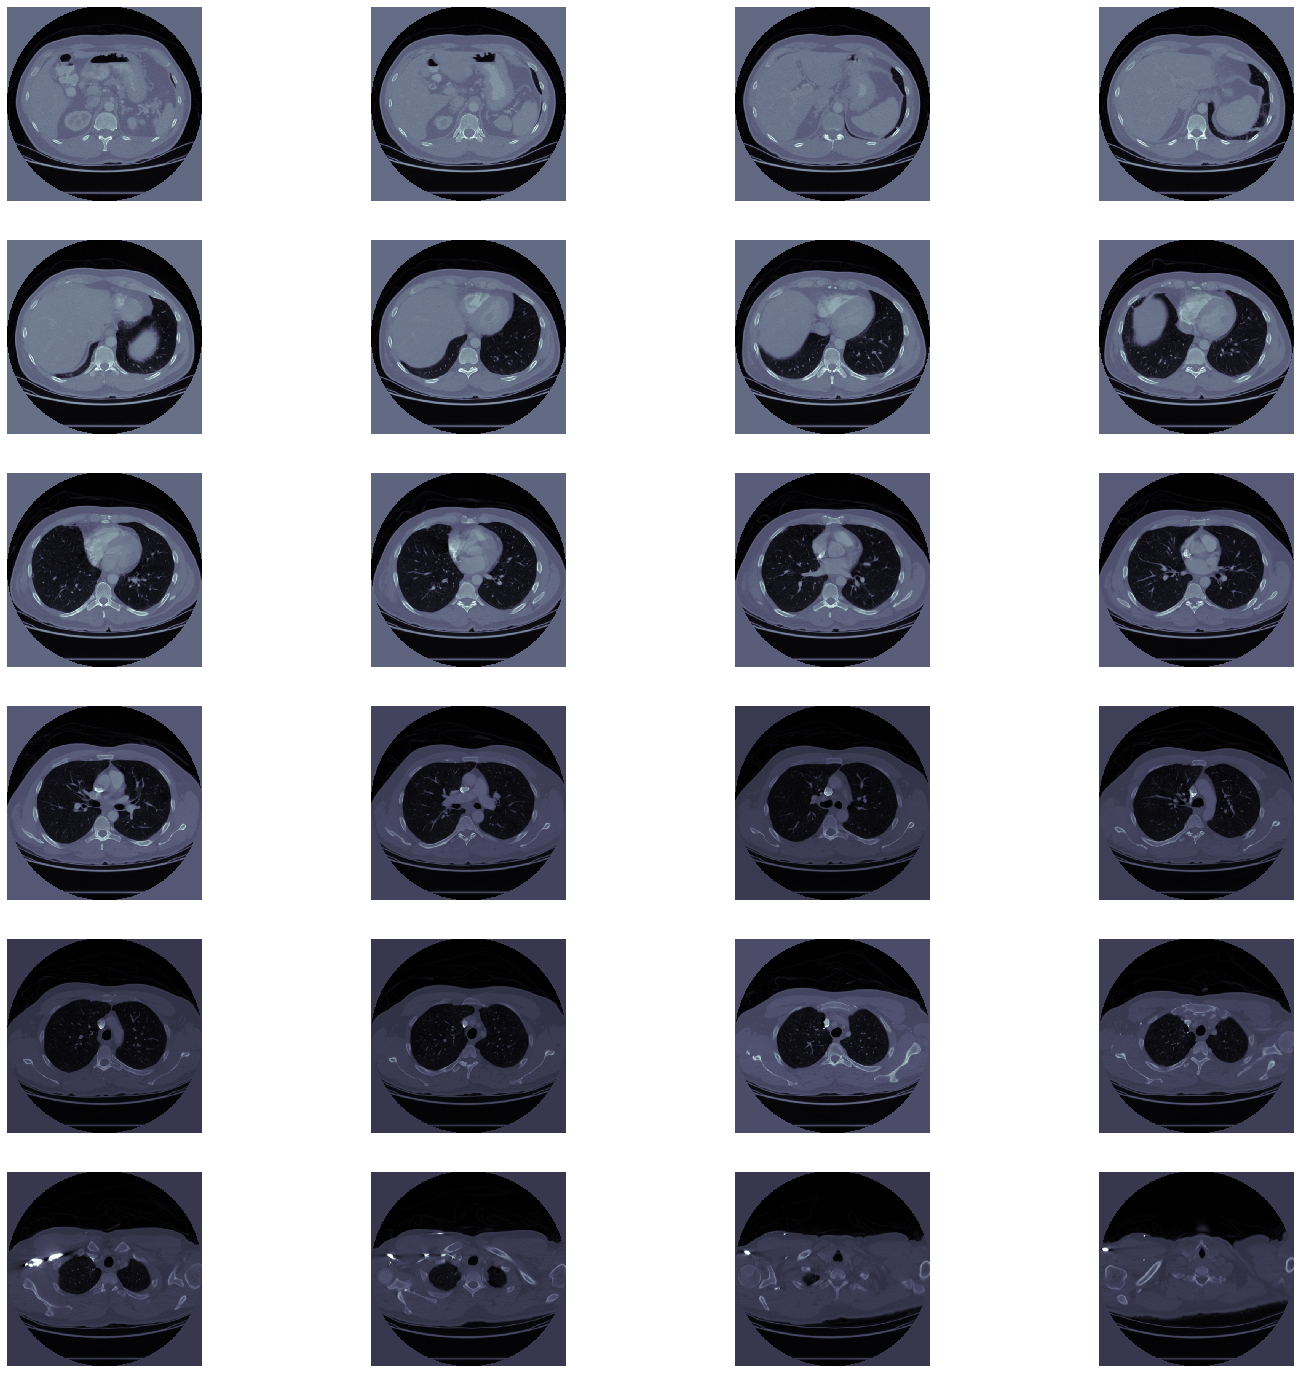

In [66]:
plot_ct_scan(img)

#### Visualize in 3D

In [0]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, x, y = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()


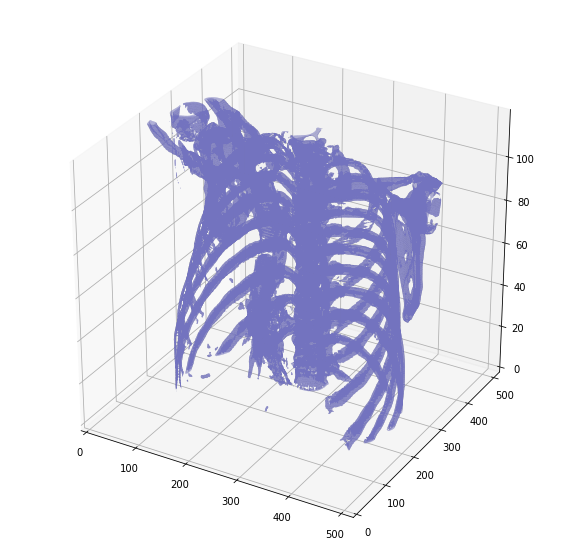

In [0]:
plot_3d(img, 400)


#### Lung segmentation

##### seg-lungs-directory

In [0]:
seg_lungs_LUNA16 = os.path.join(base_path, 'seg-lungs-LUNA16')

In [0]:
import os
from fnmatch import fnmatch

root = seg_lungs_LUNA16
pattern = "*.mhd"

images_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_list.append(os.path.join(path, name))

In [78]:
img_path = images_list[123]
print(img_path)
img = load_image(img_path)

/content/drive/My Drive/LUNA2016/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.275007193025729362844652516689.mhd


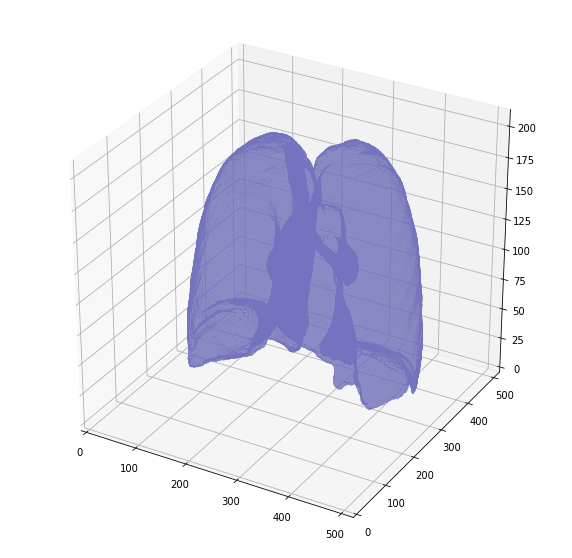

In [80]:
plot_3d(img, 0)

##### Segmentation using Image Processing methods

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#p = sns.color_palette()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Pandas configuration
pd.set_option('display.max_columns', None)


Instead of 